<a href="https://colab.research.google.com/github/Pharaohleft/Beer-review-analysis/blob/main/MAS637_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Doc for Final Project report:
https://docs.google.com/document/d/1nmrXiwwp3vbnKXUmP-Haq3zSfR-2c_8n0jDfMRTkFM0/edit

```
# This is formatted as code
```



In [ ]:
!pip install pregress



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 7.4 MB/s eta 0:00:00


In [ ]:
import pregress as pr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("BeerReview.csv")



1. Descriptive Analysis of Data (25 points)
 - Details: Include a detailed descriptive analysis of the dataset. Generate tables,
correlation matrices, scatter plots, bar charts, and outlier tests where applicable. Use
markdown cells to explain key findings.

In [ ]:
#summary table
summary_stats = df.describe()
print(summary_stats)

               ABV  Astringency         Body      Alcohol       Bitter  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean      6.526688    16.515796    46.129496    17.055990    36.364404   
std       2.546997    10.410661    25.947842    17.331334    25.791152   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000     9.000000    29.000000     6.000000    17.000000   
50%       6.000000    14.000000    40.000000    11.000000    31.000000   
75%       7.600000    21.000000    58.000000    22.000000    52.000000   
max      57.500000    81.000000   175.000000   139.000000   150.000000   

             Sweet         Sour        Salty       Fruits        Hoppy  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     58.270879    33.145449     1.017204    38.529559    40.924617   
std      34.281310    35.780172     2.132651    32.296646    30.403641   
min       0.000000     0.000000     0

In [ ]:
summary_stats = df.describe().T
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
summary_stats.reset_index(inplace=True)
summary_stats.rename(columns={'index': 'Statistic'}, inplace=True)

print(summary_stats)

            Statistic   count        mean         std       min        25%  \
0                 ABV  3197.0    6.526688    2.546997  0.000000   5.000000   
1         Astringency  3197.0   16.515796   10.410661  0.000000   9.000000   
2                Body  3197.0   46.129496   25.947842  0.000000  29.000000   
3             Alcohol  3197.0   17.055990   17.331334  0.000000   6.000000   
4              Bitter  3197.0   36.364404   25.791152  0.000000  17.000000   
5               Sweet  3197.0   58.270879   34.281310  0.000000  33.000000   
6                Sour  3197.0   33.145449   35.780172  0.000000  11.000000   
7               Salty  3197.0    1.017204    2.132651  0.000000   0.000000   
8              Fruits  3197.0   38.529559   32.296646  0.000000  12.000000   
9               Hoppy  3197.0   40.924617   30.403641  0.000000  18.000000   
10             Spices  3197.0   18.345637   23.756582  0.000000   4.000000   
11              Malty  3197.0   75.330935   39.909338  0.000000 

In [ ]:
Review_overall_count = df['review_overall'].value_counts()
print(Review_overall_count)

review_overall
4.000000    95
3.500000    60
3.750000    45
4.500000    27
3.666667    24
            ..
3.256983     1
2.541401     1
3.723301     1
3.752381     1
3.879310     1
Name: count, Length: 2325, dtype: int64


In [ ]:
Style_count = df['Style'].value_counts()
print(Style_count)

Style
Lager                     567
Stout                     254
WheatBeer                 206
Porter                    164
IPA                       163
Bock                      155
StrongAle                 148
Lambic                    100
PaleAle                    98
BrownAle                   94
RedAle                     90
Pilsner                    86
Bitter                     74
FarmhouseAle               72
ScottishAle                69
Barleywine                 64
BlondeAle                  64
Sour                       57
MildAle                    47
Dubbel                     41
WinterWarmer               40
Altbier                    39
FruitandFieldBeer          37
Tripel                     37
RyeBeer                    37
OldAle                     34
Quadrupel(Quad)            34
Kölsch                     32
LowAlcoholBeer             32
PumpkinBeer                30
SmokedBeer                 28
ChileBeer                  25
HerbandSpiceBeer           24
Crea

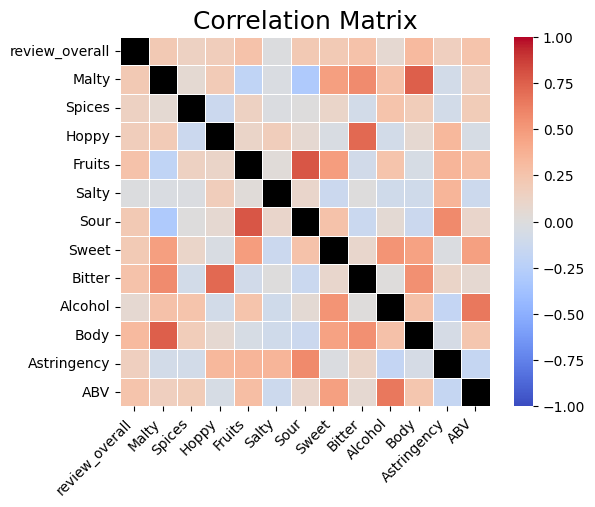

In [ ]:
pr.plot_cor(df[['review_overall','Malty','Spices','Hoppy','Fruits','Salty','Sour','Sweet','Bitter','Alcohol','Body','Astringency','ABV']], annot=False)

The correlation matrix analyzed the relationship between beer characteristics and overall review scores. Certain traits had a positive correlation with higher ratings, while traits like "sweet" and "sour" had a negative relationship with overall reviews.


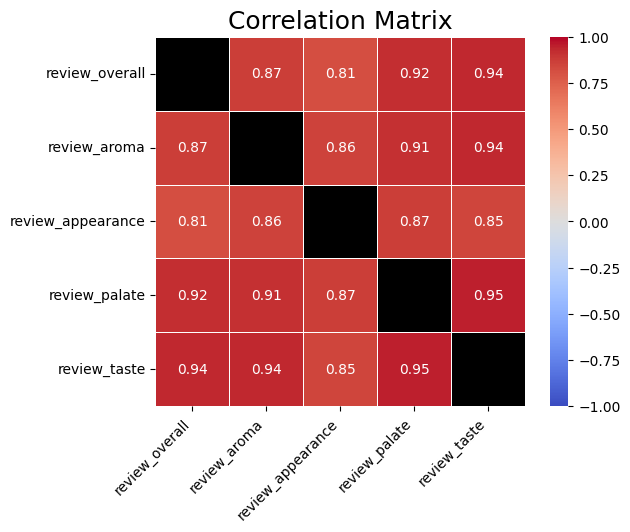

In [ ]:
#Correlation between reviews(aroma, appearance, palate, taste)
pr.plot_cor(df[['review_overall', "review_aroma", "review_appearance", "review_palate", "review_taste"]])

The correlation matrix shows strong positive relationships between different aspects of beer reviews. Taste, aroma, and palate are highly correlated with overall ratings (0.94, 0.87, and 0.92), suggesting that consumers' overall impressions of beer are heavily influenced by these sensory attributes. Appearance, while still positively correlated, has a slightly weaker relationship with overall reviews (0.81), indicating that visual appeal plays a lesser but still significant role in beer ratings.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

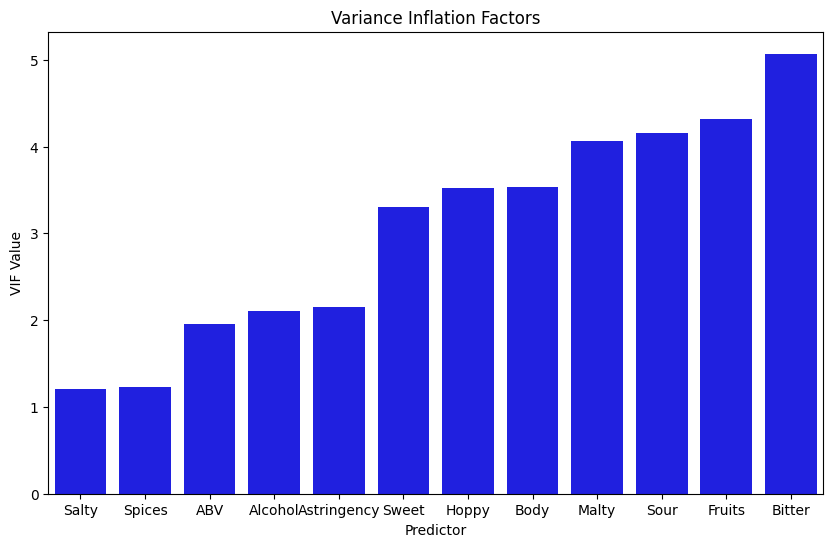

,Salty,Spices,ABV,Alcohol,Astringency,Sweet,Hoppy,Body,Malty,Sour,Fruits,Bitter
VIF,1.207331,1.227264,1.958405,2.109148,2.149861,3.301803,3.525743,3.533665,4.059817,4.15262,4.312625,5.06956


In [ ]:
pr.vif('review_overall ~ Malty + Spices + Hoppy + Fruits + Salty + Sour + Sweet + Bitter + Alcohol + Body + Astringency + ABV', data = df,  plot=True)


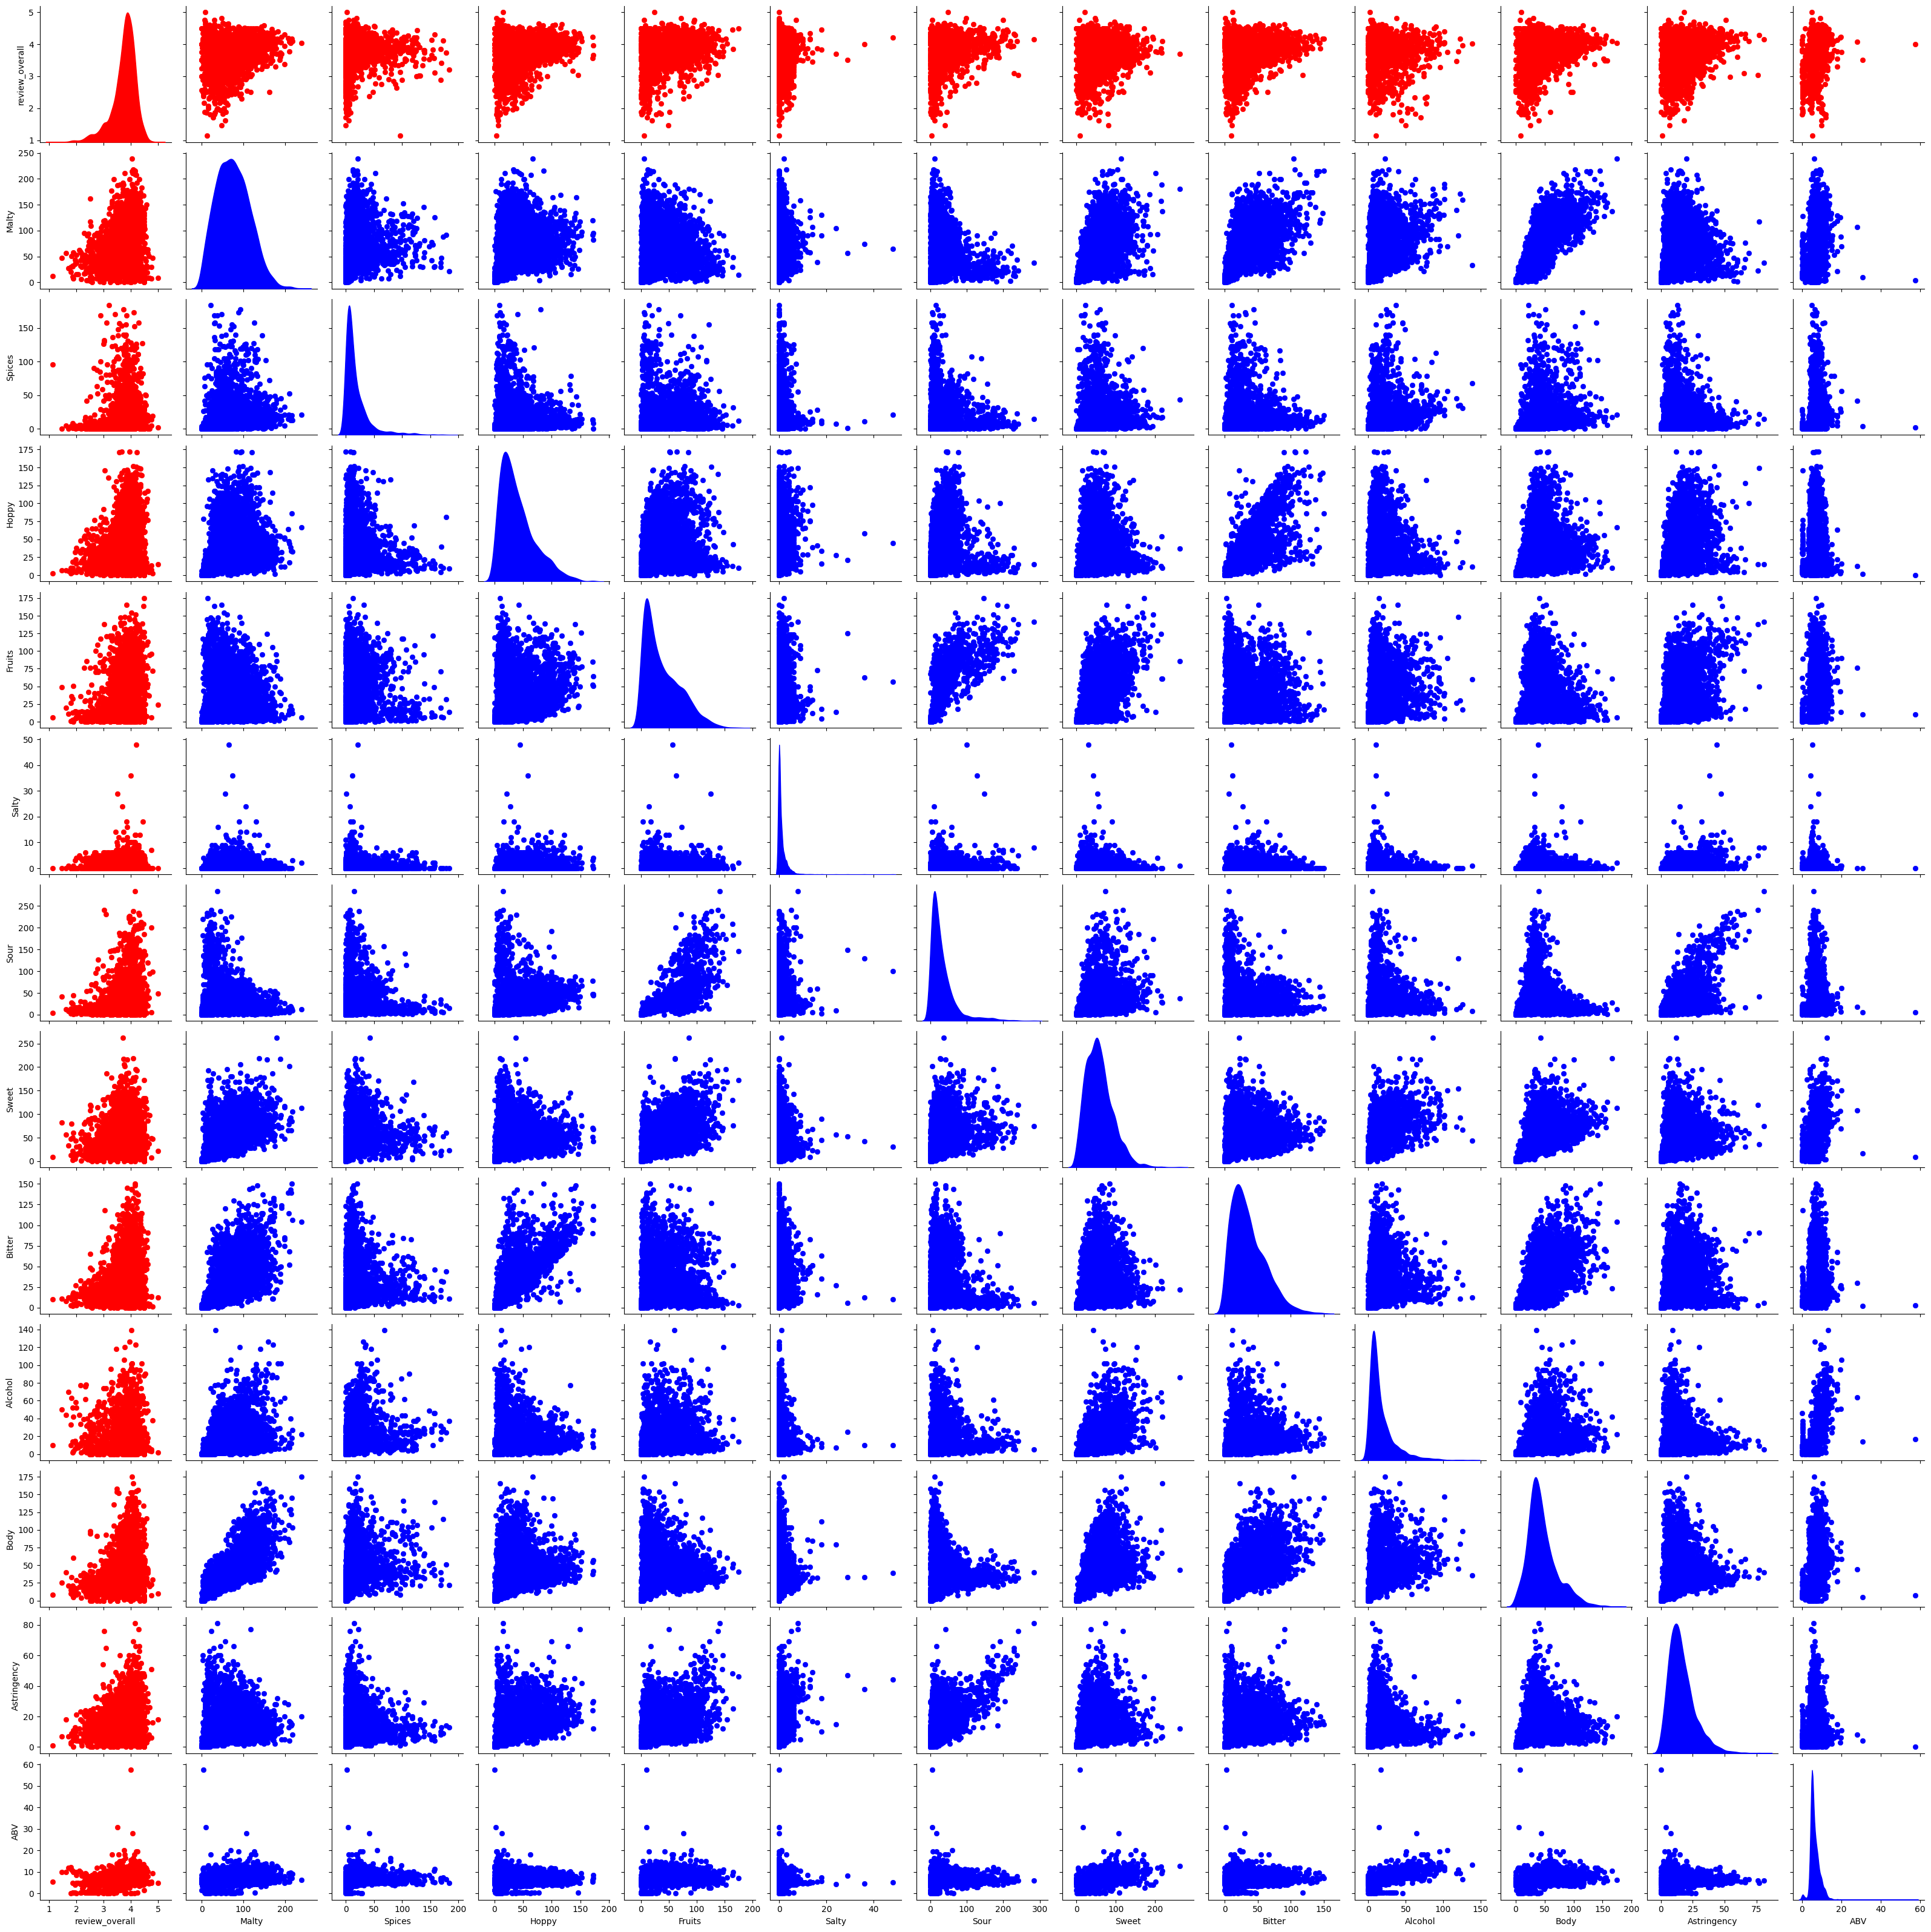

In [ ]:
pr.plots("review_overall ~ Malty + Spices + Hoppy + Fruits + Salty + Sour + Sweet + Bitter + Alcohol + Body + Astringency + ABV", data = df)

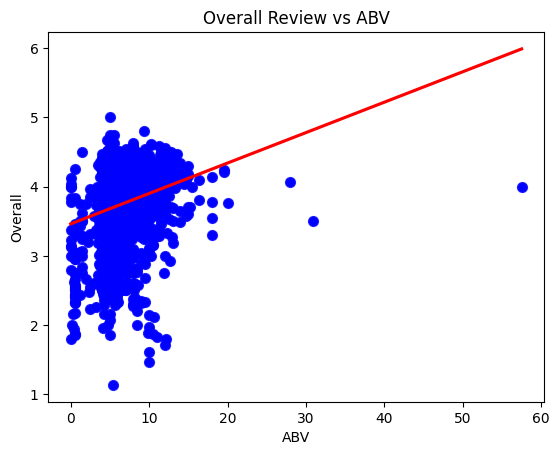

In [ ]:
pr.plotXY("review_overall ~ ABV", data = df, model="line", main="Overall Review vs ABV", xlab="ABV", ylab="Overall")

The regression line shows that higher alcohol content is linked to better beer ratings.

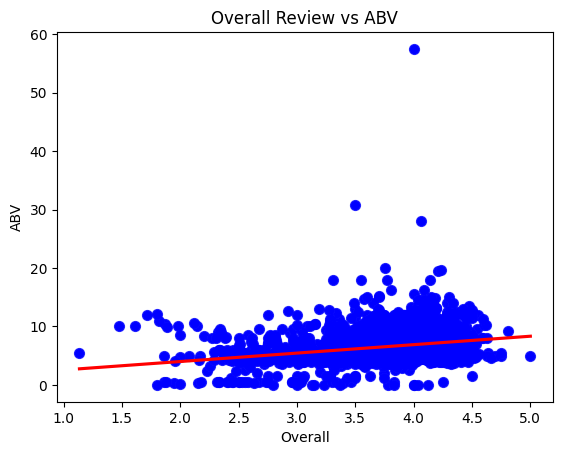

In [ ]:
#Same plot as above
pr.plotXY("  ABV~ review_overall", data = df, model="line", main="Overall Review vs ABV", xlab="Overall", ylab="ABV")

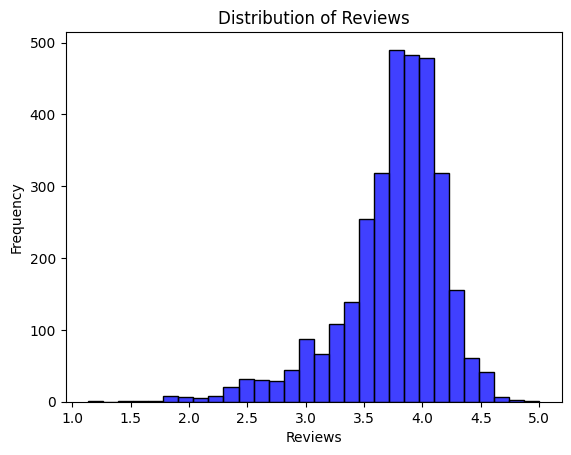

In [ ]:
#Distrubution of Reviews from 1 - 5
pr.hist(df.review_overall, main="Distribution of Reviews", xlab="Reviews", ylab="Frequency")




The histogram clearly illustrates the frequency of reviews, displaying a classic bell curve pattern.

In [ ]:
df.Style.value_counts().head(10)

,count
Style,
Lager,567
Stout,254
WheatBeer,206
Porter,164
IPA,163
Bock,155
StrongAle,148
Lambic,100
PaleAle,98


The table displays the 10 beer styles with the most reviews.

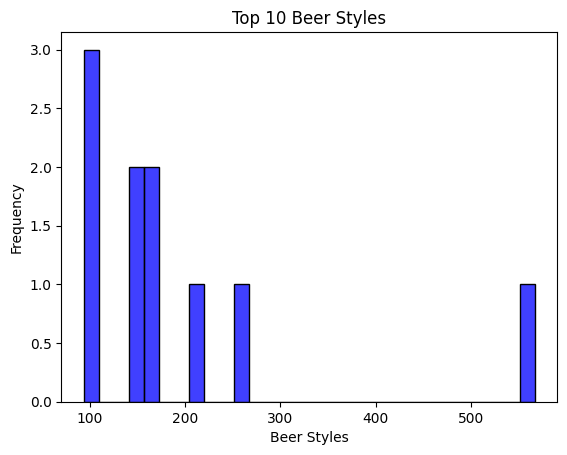

In [ ]:
pr.hist(df.Style.value_counts().head(10), main="Top 10 Beer Styles", xlab="Beer Styles", ylab="Frequency")

In [ ]:
df_new=pd.get_dummies(df, columns=['Style'])
df_new['Style_Lager'] = np.where(df_new['Style_Lager'] == True, 1, 0)
df_new['Style_Stout'] = np.where(df_new['Style_Stout'] == True, 1, 0)
df_new['Style_WheatBeer'] = np.where(df_new['Style_WheatBeer'] == True, 1, 0)
df_new['Style_Porter'] = np.where(df_new['Style_Porter'] == True, 1, 0)
df_new['Style_IPA'] = np.where(df_new['Style_IPA'] == True, 1, 0)
df_new['Style_Bock'] = np.where(df_new['Style_Bock'] == True, 1, 0)
df_new['Style_PaleAle'] = np.where(df_new['Style_PaleAle'] == True, 1, 0)
df_new['Style_StrongAle'] = np.where(df_new['Style_StrongAle'] == True, 1, 0)
df_new['Style_Lambic'] = np.where(df_new['Style_Lambic'] == True, 1, 0)
df_new['Style_BrownAle'] = np.where(df_new['Style_BrownAle'] == True, 1, 0)

df_new.head()

,Beer Name (Full),ABV,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,...,Style_RyeBeer,Style_ScottishAle,Style_SmokedBeer,Style_Sour,Style_Stout,Style_StrongAle,Style_Tripel,Style_WheatBeer,Style_WildAle,Style_WinterWarmer
0,Alaskan Brewing Co. Alaskan Amber,5.3,13,32,9,47,74,33,0,33,...,False,False,False,False,0,0,False,0,False,False
1,Long Trail Brewing Co. Double Bag,7.2,12,57,18,33,55,16,0,24,...,False,False,False,False,0,0,False,0,False,False
2,Long Trail Brewing Co. Long Trail Ale,5.0,14,37,6,42,43,11,0,10,...,False,False,False,False,0,0,False,0,False,False
3,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,8.5,13,55,31,47,101,18,1,49,...,False,False,False,False,0,0,False,0,False,False
4,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,7.2,25,51,26,44,45,9,1,11,...,False,False,False,False,0,0,False,0,False,False


Based on the 10 most reviewed styles, dummy variables were created for analysis in regression model 2 and ANOVA test.

In [ ]:
#Used this code to ensure that dummy varaibles were set correctly.
df_new['Style_WheatBeer'].value_counts()


,count
Style_WheatBeer,
0,2991
1,206


2. Modeling - Parsimonious Model (20 points)
 - Details: Create a regression model using no more than 8 predictor variables. Ensure the
model is parsimonious, meaning it is both simple and eWective at explaining variance.
Code should be clean and easy to follow.

In [ ]:
#Regression analysis for Overall score based on sensories

Reg1 = pr.fit("review_overall ~ Malty + Spices + Hoppy  + Salty + Sour + Sweet + Body + ABV", data = df)
pr.summary(Reg1)

Summary of Regression Analysis:

Coefficients:
------------------------------------------------------
             coef  std err        t     P>|t|     
Intercept  3.1144    0.025  124.478  0.000000  ***
Malty      0.0011    0.000    3.368  0.001000   **
Spices     0.0015    0.000    4.953  0.000000  ***
Hoppy      0.0020    0.000    8.172  0.000000  ***
Salty     -0.0048    0.003   -1.413  0.158000     
Sour       0.0035    0.000   14.369  0.000000  ***
Sweet     -0.0017    0.000   -5.542  0.000000  ***
Body       0.0045    0.000   10.343  0.000000  ***
ABV        0.0336    0.003   10.664  0.000000  ***

Model Statistics:
------------------------------------------------------
R-squared: 0.2209                AIC: 3104.4379
Adj. R-squared: 0.2189           BIC: 3159.0676
F-statistic: 112.97 on 8 and 3188 DF, p-value: 0.000000


The results of the regression analysis indicate that several sensory attributes have a significant impact on the overall review score:

**Positive effects:** Malty, Spices, Hoppy, Sour, Body, and ABV all contribute positively to the overall score.

**Negative effects:** Salty and Sweet have negative associations, with Sweet being particularly impactful.

The model explains a modest amount of variance in the overall score, suggesting that other factors may also play a role in influencing consumer perceptions.

Overall, this analysis offers valuable insights into how different sensory attributes affect the perceived quality of a product. These insights could be beneficial for producers and marketers seeking to enhance their offerings.

In [ ]:
#Regression analysis for Overall score based on beer style. The regression results show that certain beer styles significantly affect the overall review score. Lager has a negative effect, while Stout, IPA, Porter, Strong Ale, and Lambic have a positive effect. Wheat Beer, Bock, Pale Ale, and Brown Ale do not significantly affect the overall score. The model explains only a small proportion of the score variance, suggesting other factors influence the ratings not captured by beer styles alone.
Reg2 = pr.fit("review_overall ~ Style_Lager + Style_Stout + Style_WheatBeer + Style_Porter + Style_IPA + Style_Bock + Style_PaleAle + Style_StrongAle + Style_Lambic + Style_BrownAle + ABV", data = df_new)
pr.summary(Reg2)

Summary of Regression Analysis:

Coefficients:
------------------------------------------------------
                   coef  std err        t     P>|t|     
Intercept        3.5530    0.022  158.318  0.000000  ***
Style_Lager     -0.3494    0.020  -17.121  0.000000  ***
Style_Stout      0.1496    0.028    5.435  0.000000  ***
Style_WheatBeer  0.0412    0.030    1.370  0.171000     
Style_Porter     0.1422    0.033    4.298  0.000000  ***
Style_IPA        0.1709    0.033    5.133  0.000000  ***
Style_Bock      -0.0384    0.034   -1.118  0.263000     
Style_PaleAle    0.0926    0.042    2.211  0.027000    *
Style_StrongAle  0.0112    0.035    0.316  0.752000     
Style_Lambic     0.2304    0.041    5.552  0.000000  ***
Style_BrownAle   0.0251    0.043    0.590  0.555000     
ABV              0.0332    0.003   11.145  0.000000  ***

Model Statistics:
------------------------------------------------------
R-squared: 0.1995                AIC: 3197.0145
Adj. R-squared: 0.1967           BI

The regression analysis shows that certain beer styles have a significant impact on overall review scores:
**Negative Impact:** Lager is associated with lower scores.

**Positive Impact:** Stout, IPA, Porter, Strong Ale, and Lambic styles receive higher ratings.
No Significant Effect: Wheat Beer, Bock, Pale Ale, and Brown Ale do not show a significant impact on the overall score.

The model explains only a modest portion of score variance, suggesting that other factors, such as sensory attributes or brewing quality, may also play a crucial role in shaping consumer reviews. Understanding these relationships can help brewers and marketers optimize their products and strategies.

 3. ANOVA Test (Coding) (20 points)
 - Details: Perform the ANOVA test within the notebook. Code should be functional and
properly labeled, with a brief markdown explaining the purpose of the test.

In [ ]:
#The ANOVA test was conducted to determine if there are significant differences in the average overall review scores among the top 10 different beer styles.

aov1 = pr.fit("review_overall ~ Style_Lager + Style_Stout + Style_WheatBeer + Style_Porter + Style_IPA + Style_Bock + Style_PaleAle + Style_StrongAle + Style_Lambic + Style_BrownAle + ABV", data = df_new)
pr.summary(aov1, out = "anova")

              df      sum_sq    mean_sq          F  Pr(>F)
Regression    11  125.849344  11.440849  72.154468  0.0000
Residual    3185  505.015233   0.158561                   
Total       3196  630.864577                              


The analysis indicates significant variations in overall review scores across beer styles and ABV levels, suggesting these factors heavily influence consumer ratings.

In [ ]:
pr.summary(aov1)

Summary of Regression Analysis:

Coefficients:
------------------------------------------------------
                   coef  std err        t     P>|t|     
Intercept        3.5530    0.022  158.318  0.000000  ***
Style_Lager     -0.3494    0.020  -17.121  0.000000  ***
Style_Stout      0.1496    0.028    5.435  0.000000  ***
Style_WheatBeer  0.0412    0.030    1.370  0.171000     
Style_Porter     0.1422    0.033    4.298  0.000000  ***
Style_IPA        0.1709    0.033    5.133  0.000000  ***
Style_Bock      -0.0384    0.034   -1.118  0.263000     
Style_PaleAle    0.0926    0.042    2.211  0.027000    *
Style_StrongAle  0.0112    0.035    0.316  0.752000     
Style_Lambic     0.2304    0.041    5.552  0.000000  ***
Style_BrownAle   0.0251    0.043    0.590  0.555000     
ABV              0.0332    0.003   11.145  0.000000  ***

Model Statistics:
------------------------------------------------------
R-squared: 0.1995                AIC: 3197.0145
Adj. R-squared: 0.1967           BI

Analysis reveals that certain beer styles (particularly Stout, Porter, IPA, Lambic, and Pale Ale) and ABV significantly influence overall review scores, while others (Lager, Wheat Beer, Bock, Strong Ale, and Brown Ale) do not. The model explains a modest portion of the variance, suggesting that additional factors may also play a role in consumer ratings.

4. Individual Significance Test (Coding) (10 points)
 - Details: Code the individual significance test, ensuring it is well-commented. Display
results in a clean, organized manner with interpretation of key statistics.

In [ ]:
pr.summary(Reg1, out = "coef")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1144      0.025    124.478      0.000       3.065       3.163
Malty          0.0011      0.000      3.368      0.001       0.000       0.002
Spices         0.0015      0.000      4.953      0.000       0.001       0.002
Hoppy          0.0020      0.000      8.172      0.000       0.002       0.003
Salty         -0.0048      0.003     -1.413      0.158      -0.011       0.002
Sour           0.0035      0.000     14.369      0.000       0.003       0.004
Sweet         -0.0017      0.000     -5.542      0.000      -0.002      -0.001
Body           0.0045      0.000     10.343      0.000       0.004       0.005
ABV            0.0336      0.003     10.664      0.000       0.027       0.040


**Key Significance Summary**

**Statistically Significant Predictors:** Malty, Spices, Hoppy, Sour, Sweet, Body, and ABV all exhibit significant effects on overall scores, supported by their low p-values (< 0.05).
Not Statistically Significant: Salty does not display a statistically significant effect, suggesting it may not play a meaningful role in determining overall scores.

**Direction of Effects:** Positive coefficients demonstrate that increases in sensory attributes (Malty, Spices, Hoppy, Sour, Body, and ABV) lead to higher overall scores, while Sweet and Salty have negative effects, indicating they detract from the overall score.
But **we reject the Null Hypothesis** (H0) because the estimated effect of ABV (0.0336) significantly differs from 0.1. This indicates strong evidence that the impact of ABV on the overall score is not equal to 0.1; instead, it is approximately 0.0336 per 1% increase in ABV.

In [ ]:
pr.summary(Reg2, out = "coef")

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5530      0.022    158.318      0.000       3.509       3.597
Style_Lager        -0.3494      0.020    -17.121      0.000      -0.389      -0.309
Style_Stout         0.1496      0.028      5.435      0.000       0.096       0.204
Style_WheatBeer     0.0412      0.030      1.370      0.171      -0.018       0.100
Style_Porter        0.1422      0.033      4.298      0.000       0.077       0.207
Style_IPA           0.1709      0.033      5.133      0.000       0.106       0.236
Style_Bock         -0.0384      0.034     -1.118      0.263      -0.106       0.029
Style_PaleAle       0.0926      0.042      2.211      0.027       0.010       0.175
Style_StrongAle     0.0112      0.035      0.316      0.752      -0.058       0.081
Style_Lambic        0.2304      0.041      5.552      0.000       0.149     

Summary of ABV Effects:

The impact of ABV is such that for every 1% increase in alcohol content, there is an associated increase of approximately 0.0332 units in the overall score. This shows a positive relationship, meaning a higher ABV is linked to a slightly higher rating. *However*, the effect's magnitude is much less than the hypothesized value of 0.1.
The estimated coefficient 0.0332 significantly differs from the hypothesized value of 0.1, leading us to **reject the null hypothesis.** This suggests that the effect of ABV on the overall score is approximately 0.0332 per 1% increase in ABV.

5. Diagnostics - Coding (10 points)
 - Details: Include residual plots, normality tests, and other relevant diagnostics to check
regression assumptions. Ensure that plots are properly labeled with descriptive titles and
axes.

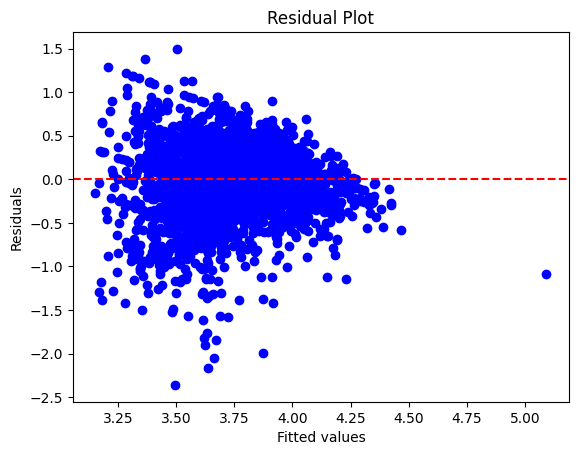

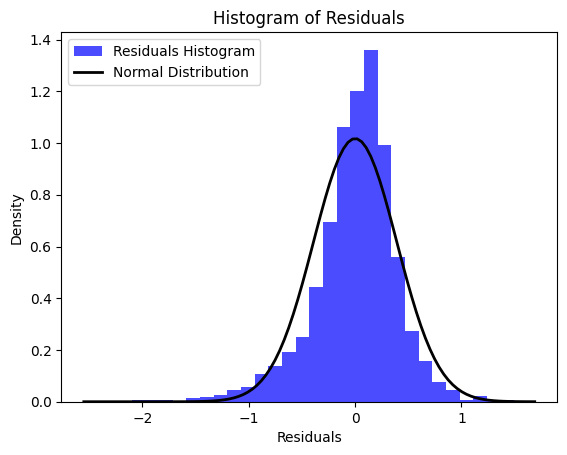

In [ ]:
#Regression analysis for Overall score based on sensories (Malty + Spices + Hoppy  + Salty + Sour + Sweet + Body + ABV)
pr.plot_res(Reg1)
pr.hist_res(Reg1)

This plot illustrates the difference between actual and predicted values on the vertical axis and the predicted values by the model on the horizontal axis specifically for Model 1.

The histogram above is used to assess the normal distribution of residuals, a key assumption of linear regression. The overlaid normal distribution curve provides a visual reference for comparison.
The same plots and histograms were created below to analyze Model 2.

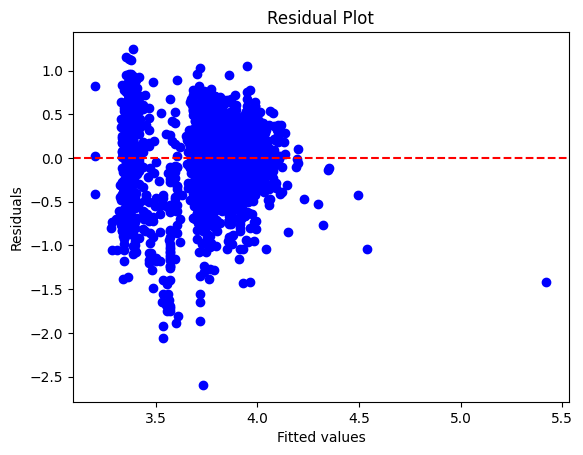

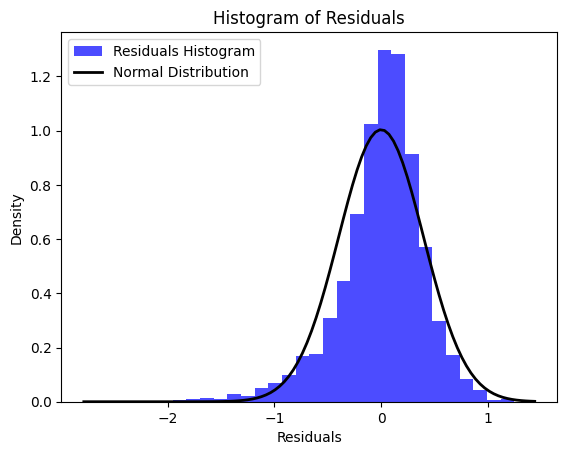

In [ ]:
#Regression analysis for Overall score based on beer style and ABV (Style_Lager + Style_Stout + Style_WheatBeer + Style_Porter + Style_IPA + Style_Bock + Style_PaleAle + Style_StrongAle + Style_Lambic + Style_BrownAle + ABV)
pr.plot_res(Reg2)
pr.hist_res(Reg2)